<a href="https://colab.research.google.com/github/mdanyassri/Project-113/blob/main/Data_story.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import statistics
import plotly.express as px

In [4]:
from google.colab import files
data_to_load = files.upload()

Saving savings_data.csv to savings_data.csv


In [5]:
df = pd.read_csv("savings_data.csv")
fig = px.scatter(df, y = "quant_saved", color = "highschool_completed")
fig.show()

In [6]:
import csv

with open("savings_data.csv", newline= "")as f:
  reader = csv.reader(f)
  savings_data = list(reader)

savings_data.pop(0)

total_entries = len(savings_data)
total_people_completed_highschool = 0
for data in savings_data:
  if int(data[3]) ==1:
    total_people_completed_highschool +=1

import plotly.graph_objects as go 
fig = go.Figure(go.Bar(x = ["Completed highschool", "Not Completed highschool"], y = [total_people_completed_highschool, (total_entries - total_people_completed_highschool)]))
fig.show()

In [7]:
all_savings = []
for data in savings_data:
  all_savings.append(float(data[0]))

print(f"mean of savings - {statistics.mean(all_savings)}")
print(f"median of savings - {statistics.median(all_savings)}")
print(f"mode of savings - {statistics.mode(all_savings)}")

mean of savings - 85.32780331328739
median of savings - 39.2724
mode of savings - 0.0


In [8]:
highschool_completed_savings = []
highschool_not_completed_savings = []

for data in savings_data:
  if int(data[3]) ==1:
    highschool_completed_savings.append(float(data[0]))
  else:
    highschool_not_completed_savings.append(float(data[0]))
  
print("Result for people who completed high school")
print(f"mean of savings - {statistics.mean(highschool_completed_savings)}")
print(f"median of savings - {statistics.median(highschool_completed_savings)}")
print(f"mode of savings - {statistics.mode(highschool_completed_savings)}")

print("\n\n")

print("Result for people who did not complete high school")
print(f"mean of savings - {statistics.mean(highschool_not_completed_savings)}")
print(f"median of savings - {statistics.median(highschool_not_completed_savings)}")
print(f"mode of savings - {statistics.mode(highschool_not_completed_savings)}")

Result for people who completed high school
mean of savings - 78.61157672384391
median of savings - 39.2724
mode of savings - 2.284



Result for people who did not complete high school
mean of savings - 87.22929365730847
median of savings - 39.2724
mode of savings - 0.0


In [9]:
print(f"Standard deviation of all savings - {statistics.stdev(all_savings)}")
print(f"Standard deviation of people who completed high school - {statistics.stdev(highschool_completed_savings)}")
print(f"Standard deviation of people who did not complete high school - {statistics.stdev(highschool_not_completed_savings)}")

Standard deviation of all savings - 196.75453011909315
Standard deviation of people who completed high school - 164.58072141099734
Standard deviation of people who did not complete high school - 204.91519933877308


In [10]:
import numpy as np

wealth = []
savings = []
for data in savings_data:
  if float(data[0]) !=0:
    wealth.append(float(data[0]))
    savings.append(float(data[0]))

correlation = np.corrcoef(wealth, savings)
print(f"Correlation between the wealth of person and their savings - {correlation[0, 1]}")

Correlation between the wealth of person and their savings - 0.9999999999999999


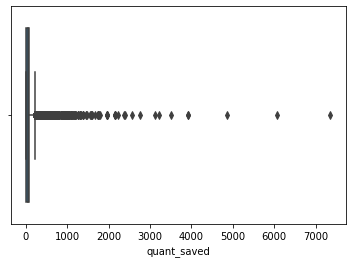

In [16]:
import seaborn as sns 
sns.boxplot(data = df, x = df["quant_saved"])

In [11]:
q1 = df["quant_saved"].quantile(0.25)
q3 = df["quant_saved"].quantile(0.75)
iqr = q3 - q1

print(f"Q1 - {q1}")
print(f"Q3 - {q3}")
print(f"IQR - {iqr}")

lower_whisker = q1-1.5*iqr
upper_whisker = q3+1.5*iqr

print(f"Lower Whisker - {lower_whisker}")
print(f"Upper Whisker - {upper_whisker}")

new_df = df[df['quant_saved'] < upper_whisker]

Q1 - 2.2840000000000003
Q3 - 86.514
IQR - 84.22999999999999
Lower Whisker - -124.06099999999998
Upper Whisker - 212.85899999999998


In [12]:
import plotly.figure_factory as ff

all_savings = new_df["quant_saved"].tolist()
print(f"Mean of savings - {statistics.mean(all_savings)}")
print(f"Median of savings - {statistics.median(all_savings)}")
print(f"Mode of savings - {statistics.mode(all_savings)}")
print(f"Standard deviation of all savings - {statistics.stdev(all_savings)}")

fig = ff.create_distplot([new_df["quant_saved"].tolist()], ["Savings"], show_hist=False)
fig.show()

Mean of savings - 46.200519389818794
Median of savings - 36.0475
Mode of savings - 0.0
Standard deviation of all savings - 50.866871917288634


In [13]:
import random
import plotly.figure_factory as ff

sampling_mean_list = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(all_savings))
  sampling_mean_list.append(statistics.mean(temp_list))

mean_sampling = statistics.mean(sampling_mean_list)
fig = ff.create_distplot([sampling_mean_list], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x = [mean_sampling, mean_sampling], y = [0, 0.1], mode = "lines", name = "MEAN"))
fig.show()

In [14]:
print(f"stddev of sampling data - {statistics.stdev(sampling_mean_list)}")
print(f"mean of all savings - {statistics.mean(all_savings)}")
print(f"mean of sampling data - {statistics.mean(sampling_mean_list)}")

stddev of sampling data - 5.065947728043412
mean of all savings - 46.200519389818794
mean of sampling data - 46.164098378613836


In [34]:
import numpy as np

temp_df = new_df[new_df.wealthy!= 3]

wealthy = temp_df["wealthy"].tolist()
savings = temp_df["quant_saved"].tolist()

correlation = np.corrcoef(wealthy, savings)
print(f"Correlation between the wealth of the person and their savings is - {correlation[0,1]}")

Correlation between the wealth of the person and their savings is - 0.024030725536925698


In [37]:
highschool_completed = new_df.loc[new_df["wealthy"]==1]
highschool_not_completed = new_df.loc[new_df["wealthy"]==0]
print(highschool_completed.head())
print(highschool_not_completed.head())

fig = ff.create_distplot([highschool_not_completed["quant_saved"].tolist()],["Savings(Not Remainded)"], show_hist=False)
fig.show()

   quant_saved  female  highschool_completed  wealthy
1      39.2724       0                     1        1
3      58.9086       1                     1        1
4      78.5448       1                     1        1
5      39.2724       1                     1        1
6      32.7270       1                     1        1
    quant_saved  female  highschool_completed  wealthy
0     13.090800       1                     0        0
9     52.363200       1                     0        0
14    78.544800       1                     1        0
15    46.152332       1                     1        0
21     2.284000       1                     1        0


In [38]:
highschool_not_completed_savings = highschool_not_completed["quant_saved"].tolist()
sampling_mean_list_highschool_not_completed = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(highschool_not_completed_savings))
  sampling_mean_list_highschool_not_completed.append(statistics.mean(temp_list))

mean_sampling_highschool_not_completed= statistics.mean(sampling_mean_list_highschool_not_completed)
stddev_sampling_highschool_not_completed = statistics.stdev(sampling_mean_list_highschool_not_completed)
print(f"mean of sampling not remainded --> {mean_sampling_highschool_not_completed}")
print(f"stddev of sampling not remainded --> {stddev_sampling_highschool_not_completed}")

fig = ff.create_distplot([sampling_mean_list_highschool_not_completed], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x = [mean_sampling, mean_sampling], y = [0, 0.1], mode = "lines", name = "MEAN"))
fig.show()

mean of sampling not remainded --> 45.7308089081836
stddev of sampling not remainded --> 5.556011090374691


In [39]:
first_stddev_start = mean_sampling_highschool_not_completed - stddev_sampling_highschool_not_completed
first_stddev_end = mean_sampling_highschool_not_completed + stddev_sampling_not_remainded
print(f"First(start) - {first_stddev_start} and First(end) - {first_stddev_end}")

second_stddev_start = mean_sampling_highschool_not_completed - (2*stddev_sampling_highschool_not_completed)
second_stddev_end = mean_sampling_highschool_not_completed + (2*stddev_sampling_not_remainded)
print(f"Second(start) - {second_stddev_start} and Second(end) - {second_stddev_end}")

third_stddev_start = mean_sampling_highschool_not_completed - (3*stddev_sampling_highschool_not_completed)
third_stddev_end = mean_sampling_highschool_not_completed + (3*stddev_sampling_highschool_not_completed)
print(f"Third(start) - {third_stddev_start} and Third(end) - {third_stddev_end}")

First(start) - 40.17479781780891 and First(end) - 50.89115862853867
Second(start) - 34.61878672743421 and Second(end) - 56.05150834889375
Third(start) - 29.062775637059524 and Third(end) - 62.39884217930767


In [40]:
highschool_completed_savings = highschool_completed["quant_saved"].tolist()
sampling_mean_list_highschool_not_completed = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(highschool_completed_savings))
  sampling_mean_list_highschool_not_completed.append(statistics.mean(temp_list))

mean_sampling_highschool_not_completed = statistics.mean(sampling_mean_list_highschool_not_completed)
stddev_sampling_highschool_not_completed = statistics.stdev(sampling_mean_list_highschool_not_completed)
print(f"mean of sampling remainded --> {mean_sampling_highschool_not_completed}")
print(f"stddev of sampling remainded --> {stddev_sampling_highschool_not_completed}")

fig = ff.create_distplot([sampling_mean_list_highschool_not_completed], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x = [mean_sampling, mean_sampling], y = [0, 0.1], mode = "lines", name = "MEAN"))
fig.show()

mean of sampling remainded --> 48.59227641351963
stddev of sampling remainded --> 5.0387940619108145


In [43]:
z_score = (mean_sampling_highschool_not_completed - mean_sampling_highschool_not_completed)/stddev_sampling_highschool_not_completed
print(f"z score is - {z_score}")

z score is - 0.0
